(1). Importing all the necessary modules:

In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

(2). Loading and seeing the dataset details:

In [2]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv("yelp.csv")

In [3]:
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())

Few dataset entries:
              business_id       date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw   1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cD

In [13]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 10)


In [14]:
# COLUMN NAMES
print("Column names:")
print(data.columns)

Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [36]:
# CONCISE SUMMARY OF DATASET
data.info(verbose=None, buf=None, max_cols=None, memory_usage=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  length       10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [17]:
# DESCRIPTIVE STATISTICS OF DATASET
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [18]:
# CHECKING FOR NULL VALUES
data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

(4). Analysis of dataset for feature extraction

In [19]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [20]:
#TOTAL REVIEW COUNT 
data['stars'].count()

10000

In [21]:
# UNIQUE STARS RATING
data.stars.unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [22]:
# INDIVIDUAL STARS COUNT
data["stars"].value_counts()

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64

In [23]:
# FINDING COUNT OF UNIQUE RESTAURANTS IN THE DATASET
data.business_id.unique()

array(['9yKzy9PApeiPPOUJEtnvkg', 'ZRJwVLyzEJq1VAihDhYiow',
       '6oRAC4uyJCsJl1X0WZpVSA', ..., 'qhIlkXgcC4j34lNTIqu9WA',
       'JOZqBKIOB8WEBAWm7v1JFA', 'f96lWMIAUhYIYy9gOktivQ'], dtype=object)

In [24]:
data_business = data["business_id"]
data_business

0       9yKzy9PApeiPPOUJEtnvkg
1       ZRJwVLyzEJq1VAihDhYiow
2       6oRAC4uyJCsJl1X0WZpVSA
3       _1QQZuf4zZOyFCvXc0o6Vg
4       6ozycU1RpktNG2-1BroVtw
                 ...          
9995    VY_tvNUCCXGXQeSvJl757Q
9996    EKzMHI1tip8rC1-ZAy64yg
9997    53YGfwmbW73JhFiemNeyzQ
9998    9SKdOoDHcFoxK5ZtsgHJoA
9999    pF7uRzygyZsltbmVpjIyvw
Name: business_id, Length: 10000, dtype: object

In [25]:
data_business.describe()

count      10000
unique      4117
top       #NAME?
freq         176
Name: business_id, dtype: object

In [26]:
data["business_id"].value_counts()

business_id
#NAME?                    176
ntN85eu27C04nwyPa8IHtw     37
JokKtdXU7zXHcr20Lrk29A     37
hW0Ne_HTHEAgGF1rAdmR-g     34
WNy1uzcmm_UHmTyR--o5IA     32
                         ... 
dnfSnHElLXntC6lWjomWPw      1
7KB3eQJASverUUah-I_0ZA      1
EVR7ss3gCgRmXZT7TvZgzA      1
u3_amLppmBrfBYUfaI0nVw      1
f96lWMIAUhYIYy9gOktivQ      1
Name: count, Length: 4117, dtype: int64

In [27]:
# Finding TOP 10 RESTAURANTS IN THE DATASET BY STARS RATING
business_agg=data.groupby('business_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [28]:
business_agg=business_agg.sort_values([('stars','mean')],ascending=False)
print("                                     Restaurants in Yelp by Stars")
business_agg

                                     Restaurants in Yelp by Stars


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
business_id                                                                  
UvK70rJjOGLx44Q4qsWz7Q         1   9/23/2008   9/23/2008      6     4    6   
R5TyRxY46mrSKU3-42-Orw         1    2/9/2010    2/9/2010      0     0    0   
Rg4dHuszzF0Mb4yqtoHSiA         1  12/17/2012  12/17/2012      1     1    1   
RdzsxC8Q3ybBcJohpywSwQ         1    7/2/2008    7/2/2008      0     1    2   
RWkNYaST4pHM2ZrRFGFcKA         1   7/12/2010   7/12/2010      1     1    1   
...                          ...         ...         ...    ...   ...  ...   
u3HMalNH-xBgZUXjnH3O6Q         1   3/19/2010   3/19/2010      0     0    0   
u2hGxSbpIOZZ3KliIELuTQ         1   1/29/2009   1/29/2009      0     0    0   
b3zJrtYqVg4ZXmiLN8V84w         1    3/4/2012    3/4/2012      0     0    0   
MEOC6ng0jPhQOX_BzEzf_w         1   1/28/2010   1/28/2010      0     0    0   
czOxS1z2MGzPXNP3W1d0Yw         1  10/30/2010  10/30/2010      0     0    0   

                       stars  
                        mean  
business_id                   
UvK70rJjOGLx44Q4qsWz7Q   5.0  
R5TyRxY46mrSKU3-42-Orw   5.0  
Rg4dHuszzF0Mb4yqtoHSiA   5.0  
RdzsxC8Q3ybBcJohpywSwQ   5.0  
RWkNYaST4pHM2ZrRFGFcKA   5.0  
...                      ...  
u3HMalNH-xBgZUXjnH3O6Q   1.0  
u2hGxSbpIOZZ3KliIELuTQ   1.0  
b3zJrtYqVg4ZXmiLN8V84w   1.0  
MEOC6ng0jPhQOX_BzEzf_w   1.0  
czOxS1z2MGzPXNP3W1d0Yw   1.0  

[4117 rows x 7 columns]

In [29]:
# Finding TOP 10 RESTAURANTS IN THE DATASET BY REVIEW COUNT
business_agg=business_agg.sort_values([('review_id','count')],ascending=False)
print("                                     Top 10 Restaurants in Yelp by reviews")
business_agg.head(10)

                                     Top 10 Restaurants in Yelp by reviews


review_id       date            useful funny cool  \
                           count        min        max    sum   sum  sum   
business_id                                                                
#NAME?                       176   1/1/2011   9/8/2010    247   100  152   
ntN85eu27C04nwyPa8IHtw        37   1/1/2011   9/3/2012     37    16   24   
JokKtdXU7zXHcr20Lrk29A        37  1/14/2008   9/5/2008     34    17   26   
hW0Ne_HTHEAgGF1rAdmR-g        34  1/17/2012   9/9/2010     67    66   50   
WNy1uzcmm_UHmTyR--o5IA        32  1/19/2011   9/5/2012     45    21   30   
VVeogjZya58oiTxK7qUjAQ        31  1/12/2011   9/6/2011     79    30   47   
V1nEpIRmEa1768oj_tuxeQ        30   1/2/2010   9/5/2012     45    20   37   
SDwYQ6eSu1htn8vHWv128g        25  1/19/2012  9/20/2012     27    11   16   
uKSX1n1RoAzGq4bV8GPHVg        25  1/16/2011  9/13/2011     29    19   10   
QnAzW6KMSciUcuJ20oI3Bw        24  1/11/2010  9/30/2012     28     9   18   

                           stars  
                            mean  
business_id                       
#NAME?                  3.789773  
ntN85eu27C04nwyPa8IHtw  3.945946  
JokKtdXU7zXHcr20Lrk29A  4.513514  
hW0Ne_HTHEAgGF1rAdmR-g  3.264706  
WNy1uzcmm_UHmTyR--o5IA  4.343750  
VVeogjZya58oiTxK7qUjAQ  4.193548  
V1nEpIRmEa1768oj_tuxeQ  4.333333  
SDwYQ6eSu1htn8vHWv128g  4.240000  
uKSX1n1RoAzGq4bV8GPHVg  3.920000  
QnAzW6KMSciUcuJ20oI3Bw  4.166667

In [30]:
# FINDING COUNT OF UNIQUE USERS IN THE DATASET
data.user_id.unique()

array(['rLtl8ZkDX5vH5nAx9C3q5Q', '0a2KyEL0d3Yb1V6aivbIuQ',
       '0hT2KtfLiobPvh6cDC8JQg', ..., 'gGbN1aKQHMgfQZkqlsuwzg',
       '0lyVoNazXa20WzUyZPLaQQ', 'KSBFytcdjPKZgXKQnYQdkA'], dtype=object)

In [31]:
data_user = data["user_id"]
data_user

0       rLtl8ZkDX5vH5nAx9C3q5Q
1       0a2KyEL0d3Yb1V6aivbIuQ
2       0hT2KtfLiobPvh6cDC8JQg
3       uZetl9T0NcROGOyFfughhg
4       vYmM4KTsC8ZfQBg-j5MWkw
                 ...          
9995    _eqQoPtQ3e3UxLE4faT6ow
9996    ROru4uk5SaYc3rg8IU7SQw
9997    gGbN1aKQHMgfQZkqlsuwzg
9998    0lyVoNazXa20WzUyZPLaQQ
9999    KSBFytcdjPKZgXKQnYQdkA
Name: user_id, Length: 10000, dtype: object

In [32]:
data_user.describe()

count      10000
unique      6325
top       #NAME?
freq         121
Name: user_id, dtype: object

In [33]:
data["user_id"].value_counts()

user_id
#NAME?                    121
fczQCSmaWF78toLEmb0Zsw     38
0CMz8YaO3f8xu4KqQgKb9Q     25
90a6z--_CUrl84aCzZyPsg     22
4ozupHULqGyO42s3zNUzOQ     18
                         ... 
0SweAOS_ChLQVv7pb51J4Q      1
UcdsKXNPHmVzi5qPQSCutg      1
x1PxZJvRo4tu-ruOXa5MqA      1
8UN5ojieloDD4WvohQo77g      1
KSBFytcdjPKZgXKQnYQdkA      1
Name: count, Length: 6325, dtype: int64

In [26]:
# Finding TOP 10 USERS IN THE DATASET
user_agg=data.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [27]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("                                     Top 10 Users in Yelp")
user_agg.head(10)

                                     Top 10 Users in Yelp


review_id        date             useful funny cool  \
                           count         min         max    sum   sum  sum   
user_id                                                                      
fczQCSmaWF78toLEmb0Zsw        38  2007-12-14  2012-07-19    293   147  263   
0CMz8YaO3f8xu4KqQgKb9Q        25  2007-01-22  2007-07-20     45    34   44   
90a6z--_CUrl84aCzZyPsg        22  2008-02-27  2012-07-23     59    22   44   
4ozupHULqGyO42s3zNUzOQ        18  2010-06-26  2012-12-10    130    59   97   
0mqHhdKEdak_A1FBhFNXqA        18  2010-04-19  2012-10-19     12    11    2   
wHg1YkCzdZq9WBJOTRgxHQ        17  2008-06-13  2012-02-01    100    79   89   
0bNXP9quoJEgyVZu9ipGgQ        16  2008-12-05  2012-04-28    115    58   88   
_PzSNcfrCjeBxSLXRoMmgQ        16  2009-11-11  2013-01-04     23    13   17   
JgDkCER12uiv4lbpmkZ9VA        15  2008-05-27  2011-01-29     30    15   15   
joIzw_aUiNvBTuGoytrH7g        15  2009-03-29  2012-01-12     34    18   22   

                           stars  
                            mean  
user_id                           
fczQCSmaWF78toLEmb0Zsw  4.131579  
0CMz8YaO3f8xu4KqQgKb9Q  4.120000  
90a6z--_CUrl84aCzZyPsg  3.954545  
4ozupHULqGyO42s3zNUzOQ  4.388889  
0mqHhdKEdak_A1FBhFNXqA  3.055556  
wHg1YkCzdZq9WBJOTRgxHQ  3.823529  
0bNXP9quoJEgyVZu9ipGgQ  2.875000  
_PzSNcfrCjeBxSLXRoMmgQ  3.750000  
JgDkCER12uiv4lbpmkZ9VA  2.933333  
joIzw_aUiNvBTuGoytrH7g  2.933333

(5). Visualization:

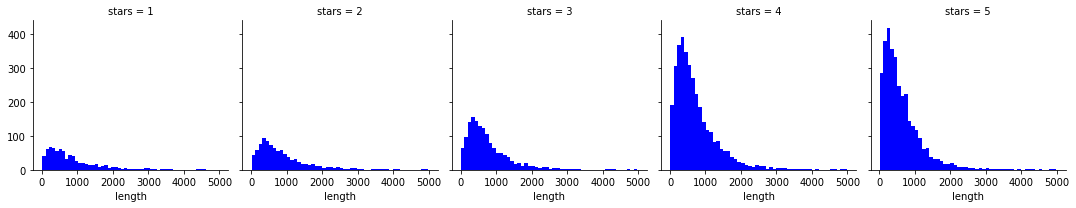

In [28]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

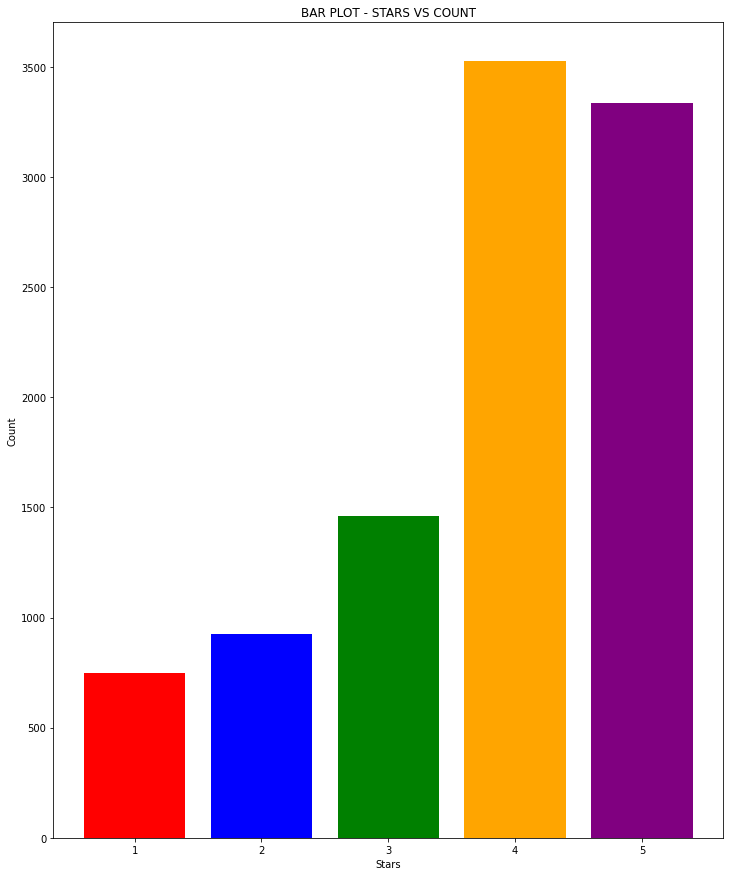

In [29]:
# BAR PLOT - STARS VS COUNT
x = [ 1, 2, 3, 4, 5]
y = [ 749, 927, 1461, 3526, 3337]
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(12, 15))

plt.bar(x, y, color=colors)

# ADDING LABLES AND TITLES
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('BAR PLOT - STARS VS COUNT')

plt.show()


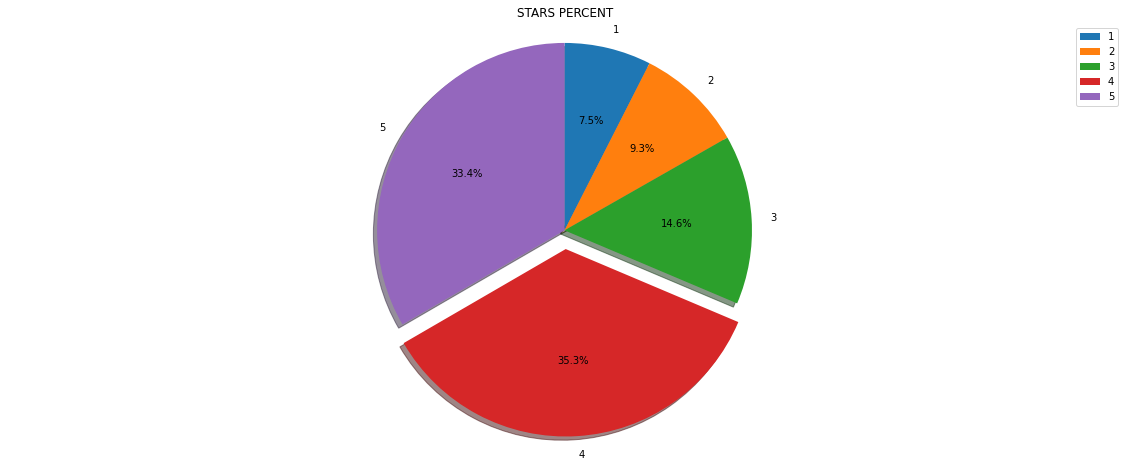

In [30]:
# PIE CHART - EACH STAR PERCENT
Stars = [ 1, 2, 3, 4, 5]
Count = y = [ 749, 927, 1461, 3526, 3337]
myexplode = [0, 0, 0, 0.1, 0]

plt.figure(figsize=(20, 8))
plt.pie(Count, labels=Stars, autopct='%1.1f%%', shadow=True, startangle=90, explode=myexplode, counterclock=False)

plt.legend(labels=Stars, loc=1)
plt.axis('equal')
plt.title('STARS PERCENT')

# Show the plot
plt.show()

<Figure size 1080x864 with 0 Axes>

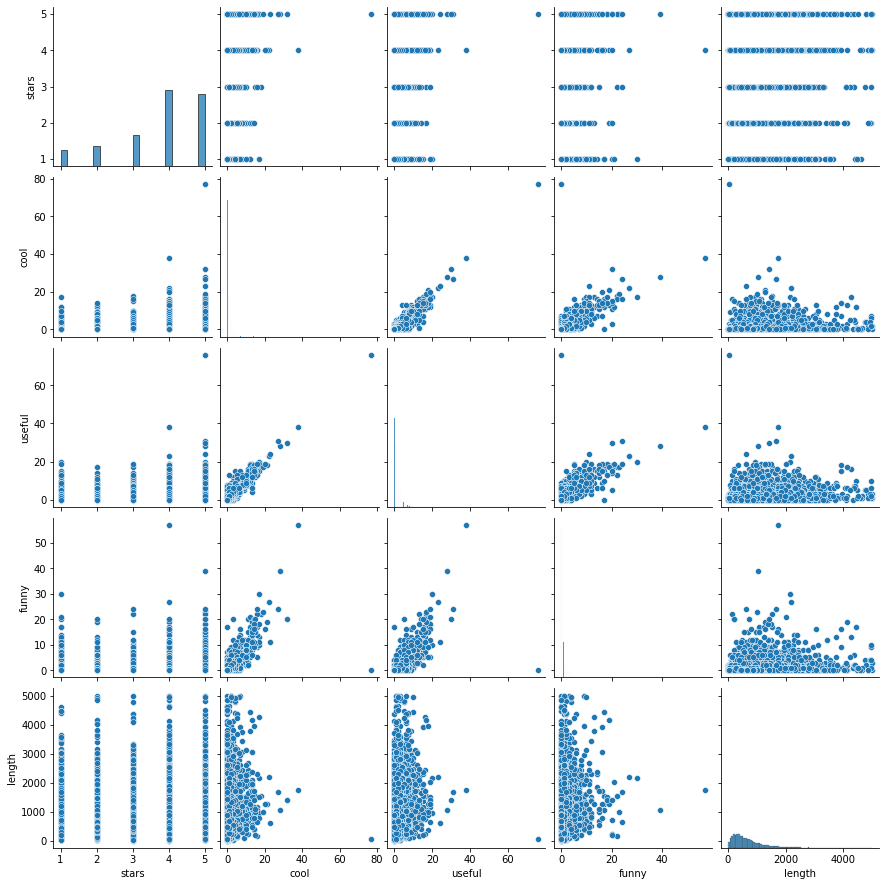

In [31]:
# PAIRPLOT FOR THE WHOLE DATASET
plt.figure(figsize=(15, 12))
sns.pairplot(data)

Text(0.5, 1.0, 'AVG RATINGS VS YEAR')

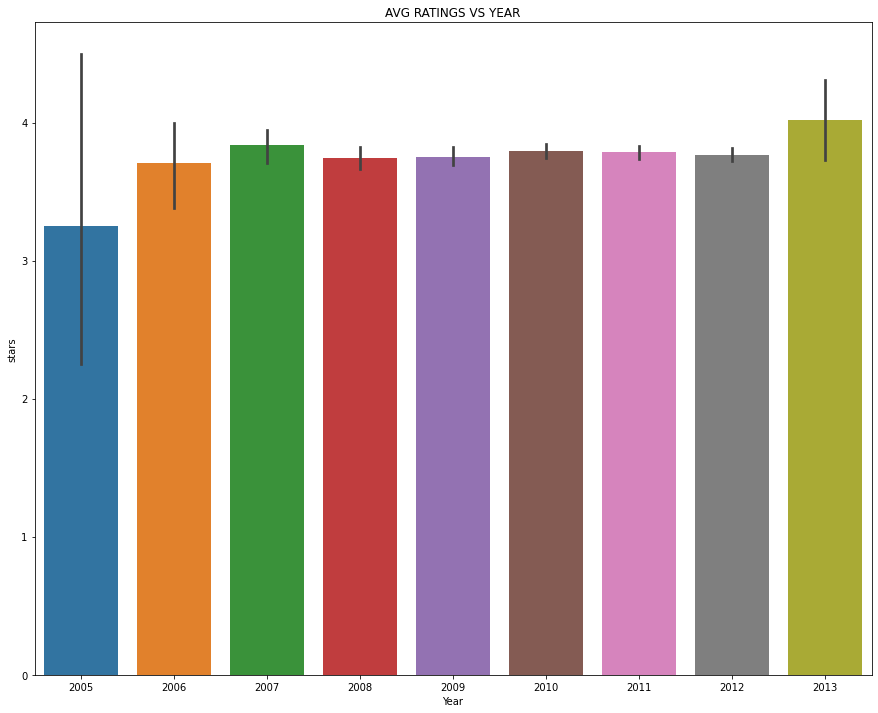

In [32]:
# BAR PLOT - AVG RATINGS VS YEAR

data["date"]= pd.to_datetime(data["date"]).dt.date
data.set_index('date').head(1)
Date_Year = pd.to_datetime(data["date"]).dt.year
plt.figure(figsize=(15, 12))
sns.barplot(x=Date_Year, y=data["stars"], data=data,)
plt.xlabel('Year')
plt.title("AVG RATINGS VS YEAR")

Text(0.5, 1.0, 'AVG RATINGS VS MONTH')

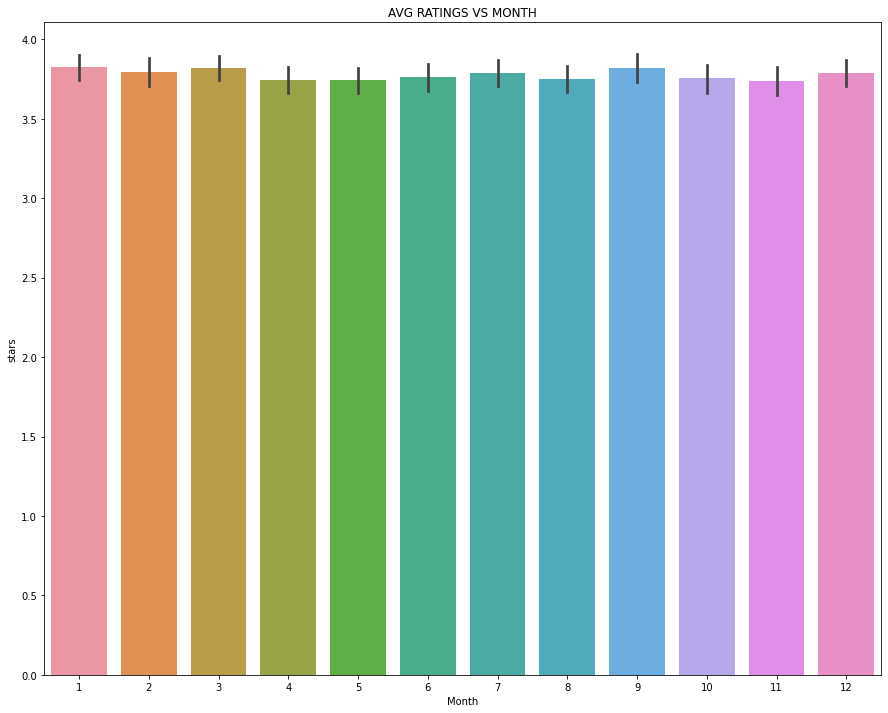

In [33]:
# BAR PLOT - AVG RATINGS VS MONTH

data["date"]= pd.to_datetime(data["date"]).dt.date
data.set_index('date').head(1)
Date_Month = pd.to_datetime(data["date"]).dt.month
plt.figure(figsize=(15, 12))
sns.barplot(x=Date_Month, y=data["stars"], data=data)
plt.xlabel('Month')
plt.title("AVG RATINGS VS MONTH")

Text(0.5, 1.0, 'AVG WORDS VS STARS')

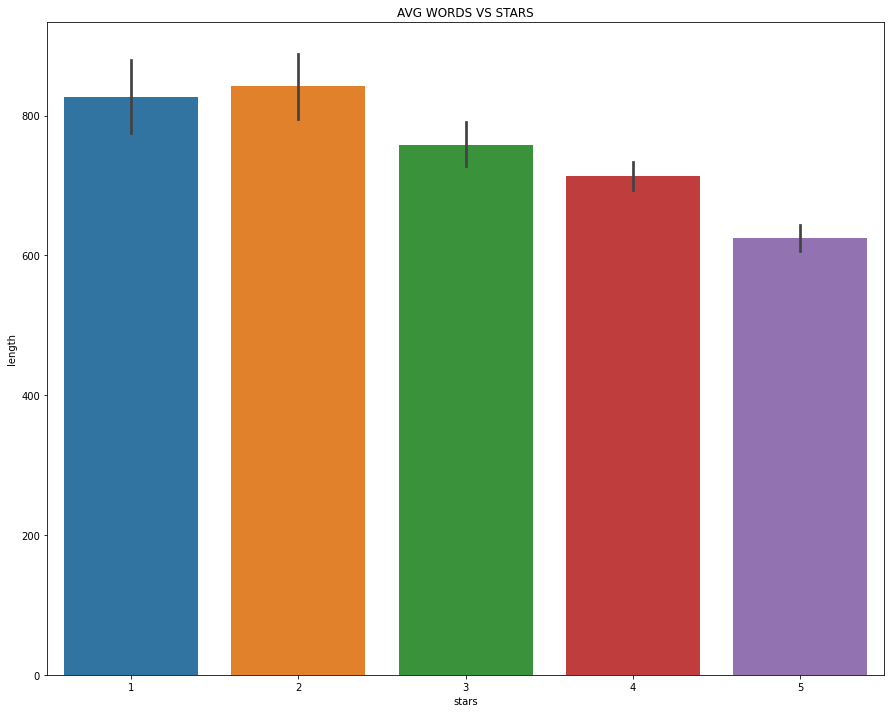

In [34]:
# BAR PLOT - AVG WORDS VS STARS
plt.figure(figsize=(15, 12))
sns.barplot(x=data["stars"], y=data["length"], data=data)
plt.title("AVG WORDS VS STARS")

(6). Mean Value of the Vote columns

In [35]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


(7). Correlation between the voting columns:

In [36]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
corr = stval.corr()
corr

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

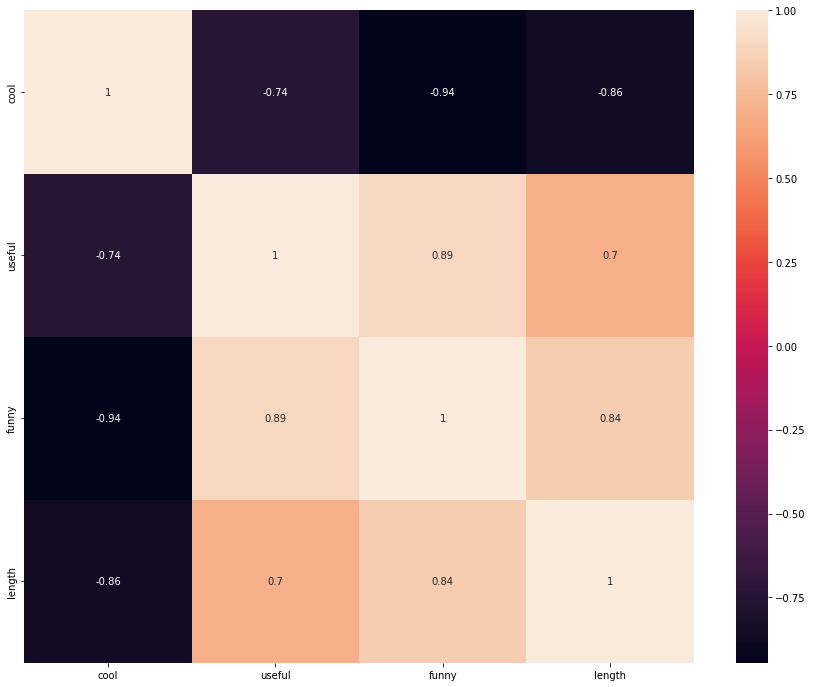

In [37]:
# HEAT MAP
plt.figure(figsize=(15, 12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

(8). Classifying the dataset and splitting it into the reviews and stars:

In [38]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [39]:
print(data_classes.shape)

(5547, 11)


In [69]:
print(data_classes['stars']==5)

0        True
1        True
3        True
4        True
6        True
        ...  
9991     True
9992     True
9994     True
9995    False
9999     True
Name: stars, Length: 5547, dtype: bool


In [70]:
print(data_classes['stars']==3)

0       False
1       False
3       False
4       False
6       False
        ...  
9991    False
9992    False
9994    False
9995     True
9999    False
Name: stars, Length: 5547, dtype: bool


In [71]:
print(data_classes['stars']==1)

0       False
1       False
3       False
4       False
6       False
        ...  
9991    False
9992    False
9994    False
9995    False
9999    False
Name: stars, Length: 5547, dtype: bool


In [40]:
# Seperate the dataset into X and Y for prediction

x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


(9). Data Cleaning:

In [41]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

(10). Vectorization

In [42]:
#python -m nltk.downloader stopwords

import nltk  
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))

31336


In [44]:
# Testing review
r0 = x[0]
print(r0)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [45]:
# Transforming
vocab0 = vocab.transform([r0])
print(vocab0)

  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8521)	1
  (0, 10646)	1
  (0, 10647)	1
  (0, 11128)	2
  (0, 11479)	1
  (0, 11779)	1
  (0, 12206)	2
  (0, 12221)	1
  (0, 12297)	1
  (0, 12386)	1
  (0, 12675)	1
  (0, 12689)	1
  (0, 13135)	1
  (0, 13186)	1
  (0, 14247)	1
  (0, 15385)	1
  (0, 16292)	1
  (0, 16412)	1
  :	:
  (0, 23318)	1
  (0, 23801)	1
  (0, 23902)	1
  (0, 23976)	1
  (0, 24080)	1
  (0, 24177)	1
  (0, 24544)	2
  (0, 24972)	2
  (0, 26383)	1
  (0, 26543)	1
  (0, 26978)	1
  (0, 27029)	1
  (0, 27068)	1
  (0, 28403)	1
  (0, 28735)	1
  (0, 29230)	1
  (0, 29313)	1
  (0, 29620)	1
  (0, 30135)	1
  (0, 30240)	1
  (0, 30471)	1
  (0, 30488)	1
  (0, 30672)	1
  (0, 30854)	1
  (0, 30900)	1


In [46]:
# Getting feature words
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[11128])
print(vocab.get_feature_names_out()[24544])

Getting the words back:
amazing
pretty


(11). Vectorization of the whole review set and and checking the sparse matrix:

In [47]:
x = vocab.transform(x)
# Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)

#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


(12). Splitting the dataset X into training and testing set:

In [48]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

(13). Modelling:

In [49]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



In [50]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[ 59  43  60]
 [ 27 148 117]
 [ 41  93 522]]
Score: 65.68
Classification Report:               precision    recall  f1-score   support

           1       0.46      0.36      0.41       162
           3       0.52      0.51      0.51       292
           5       0.75      0.80      0.77       656

    accuracy                           0.66      1110
   macro avg       0.58      0.56      0.56      1110
weighted avg       0.65      0.66      0.65      1110



In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[ 29  32 101]
 [  2 105 185]
 [  0  14 642]]
Score: 69.91
Classification Report:               precision    recall  f1-score   support

           1       0.94      0.18      0.30       162
           3       0.70      0.36      0.47       292
           5       0.69      0.98      0.81       656

    accuracy                           0.70      1110
   macro avg       0.77      0.51      0.53      1110
weighted avg       0.73      0.70      0.65      1110



In [52]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[ 31  23 108]
 [  5 122 165]
 [  1  19 636]]
Score: 71.08
Classification Report:               precision    recall  f1-score   support

           1       0.84      0.19      0.31       162
           3       0.74      0.42      0.54       292
           5       0.70      0.97      0.81       656

    accuracy                           0.71      1110
   macro avg       0.76      0.53      0.55      1110
weighted avg       0.73      0.71      0.67      1110



In [53]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[ 75  49  38]
 [  7 180 105]
 [ 12  45 599]]
Score: 76.94
Classification Report:               precision    recall  f1-score   support

           1       0.80      0.46      0.59       162
           3       0.66      0.62      0.64       292
           5       0.81      0.91      0.86       656

    accuracy                           0.77      1110
   macro avg       0.75      0.66      0.69      1110
weighted avg       0.77      0.77      0.76      1110



In [54]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 91  35  36]
 [ 21 185  86]
 [ 13  56 587]]
Score: 77.75
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.56      0.63       162
           3       0.67      0.63      0.65       292
           5       0.83      0.89      0.86       656

    accuracy                           0.78      1110
   macro avg       0.74      0.70      0.72      1110
weighted avg       0.77      0.78      0.77      1110



(14). Comparison between models


Text(0.5, 1.0, 'BAR PLOT - Models VS Accuracy')

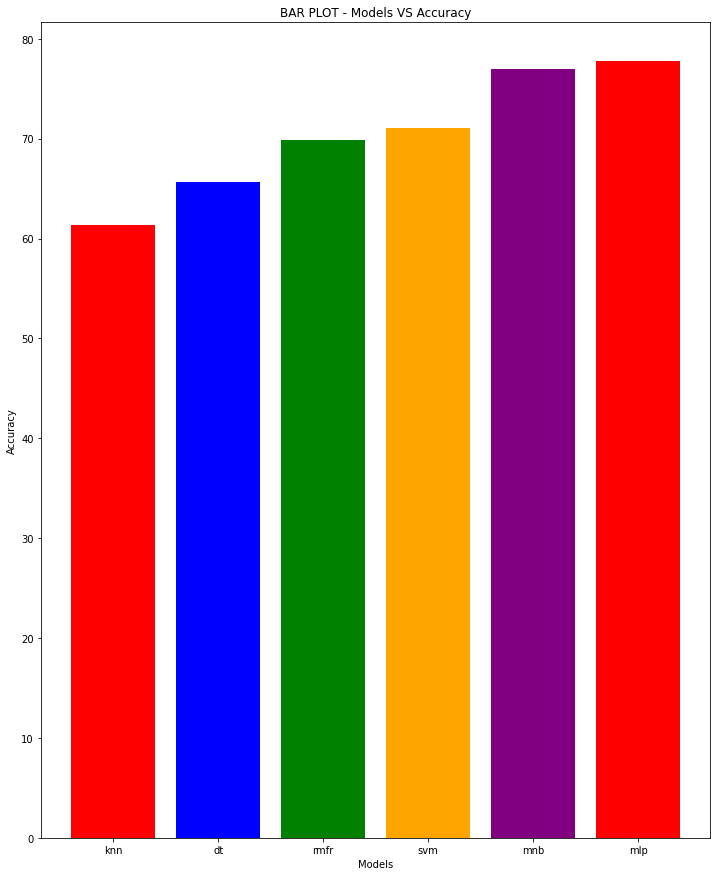

In [55]:
knn_a = round(accuracy_score(y_test,predknn)*100,2)
dt_a = round(accuracy_score(y_test,preddt)*100,2)
rmfr_a = round(accuracy_score(y_test,predrmfr)*100,2)
svm_a = round(accuracy_score(y_test,predsvm)*100,2)
mnb_a = round(accuracy_score(y_test,predmnb)*100,2)
mlp_a = round(accuracy_score(y_test,predmlp)*100,2)

x = [ 'knn', 'dt', 'rmfr', 'svm', 'mnb', 'mlp']
y = [ knn_a, dt_a, rmfr_a, svm_a, mnb_a, mlp_a]
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots(figsize=(12, 15))

plt.bar(x, y, color=colors)

# ADDING LABLES AND TITLES
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('BAR PLOT - Models VS Accuracy')


* K Neighbor Classifier = 61.35%
* Decision Tree = 66.58%
* Random Forest Classifier = 69.91%
* Support Vector Machine  = 71.08%
* Multinomial Naive Bayes = 76.94%
* Multilayer Perceptron = 77.75%


Since multilayer perceptron classifier has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

(15). Rating Prediction on basis of review text.

In [68]:
# POSITIVE REVIEW
pr = data['text'][9999]
print(pr)
print("Actual Rating: ",data['stars'][9999])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..
Actual Rating:  5
Predicted Rating:


5

In [72]:
# AVERAGE REVIEW
ar = data['text'][9995]
print(ar)
print("Actual Rating: ",data['stars'][9995])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

First visit...Had lunch here today - used my Groupon.  

We ordered the Bruschetta, Pretzels and Steak & Cheese Calzone.

-We both thought there was WAY too much Balsamic used.  Also, we expected mozzarella cheese - not Feta.

-We tried the butter and salt pretzel & cinnamon sugar with honey pretzel.  They were okay. They should have kept the honey on the side like they did for the mustard.

-The calzone was good. We liked the dough and it was fairly well filled/stuffed.

Overall, we thought it was average as far as the food is concerned - and a little pricey for quality and portions.

We have another Groupon to use so maybe we'll try a pizza for the next one.
Actual Rating:  3
Predicted Rating:


3

In [58]:
# NEGATIVE REVIEW
nr = data['text'][23]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!
Actual Rating:  1
Predicted Rating:


1